This notebook loads the saved CNN model, applies the pre-processing to the given square image of concrete surface and shows the result for the given image. A positive and a negative example are shown to illustrate the procedure and results.

In [2]:
print("Importing libraries...")

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import h5py

print("Libraries imported...")

Importing libraries...
Libraries imported...


In [3]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)  
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(6*6*16, 100)   
        self.fc2 = nn.Linear(100, 2)
        #self.dropout = nn.Dropout(0.5)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 6*6*16)
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)   

In [4]:
model2 = ConvolutionalNetwork()
model2.load_state_dict(torch.load('concrete_classifier.pt'));
model2.eval() 

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=2, bias=True)
)

In [5]:
img_size = 32
img_to_predict = "ConcreteImages/Positive/00058.jpg" 

In [6]:
# function to return the correct shape from a image path
def prepare_image(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    image = np.array(img)
    image = image/225
    image = torch.tensor(image).float()
    image= image.view(-1, 1, img_size, img_size)
    return image

In [7]:
def condition(img_to_predict):
    prepare_image(img_to_predict)
    model2.eval()
    with torch.no_grad():
        result = model2(prepare_image(img_to_predict)).argmax().item()
        if result == 0:
            predicted = 'Positive'
        else:
            predicted = 'Negative'
    print('Predicted condition is ', predicted,' for cracking')

In [8]:
condition(img_to_predict)

Predicted condition is  Positive  for cracking


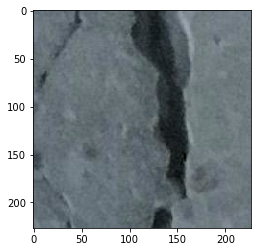

In [9]:
plt.imshow(cv2.imread(img_to_predict))

In [10]:
img_to_predict = "ConcreteImages/Negative/00058.jpg" 

In [11]:
condition(img_to_predict)

Predicted condition is  Negative  for cracking


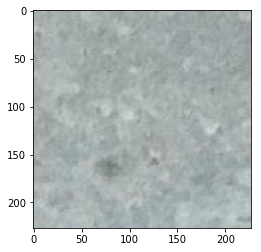

In [12]:
plt.imshow(cv2.imread(img_to_predict))